#Importar Librerías

In [ ]:
# Librería de visualización
import plotly.express as px
# Librería de la que obtendremos los datos
import sklearn.datasets as dts 
# Librería con la que manejaremos los datos
import pandas as pd

# Cargar base

In [ ]:
data_vinos = pd.DataFrame(data= dts.load_wine().data, columns = dts.load_wine().feature_names)
data_vinos

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


# Insights básicos

## Insights de limpieza y fiabilidad de los datos

In [ ]:
# Usamos la función info()
data_vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [ ]:
# Buscamos duplicados
data_vinos[data_vinos.duplicated()]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline


## Insights estadísticos

In [ ]:
# Usamos la función describe()
data_vinos["alcohol"].describe()

count    178.000000
mean      13.000618
std        0.811827
min       11.030000
25%       12.362500
50%       13.050000
75%       13.677500
max       14.830000
Name: alcohol, dtype: float64

In [ ]:
# Usamos describe() para todas las variables
for col in data_vinos.columns:
  print(col)
  print(data_vinos[col].describe())
  print("____________________")

NameError: ignored

# Visualización de distribuciones

In [ ]:
# Diagrama de caja y bigote
fig = px.box(data_vinos, y="alcalinity_of_ash")
fig.show()

In [ ]:
# Agregamos la dispersión
fig = px.box(data_vinos, y="alcalinity_of_ash", points="all")
fig.show()

In [ ]:
# Obtenemos el diagrama de caja para todas las variables
for e in data_vinos.columns:
  fig = px.box(data_vinos, y=e, points="all")
  fig.show()

### Conclusiones sobres los diagramas de caja
Todas las distribuciones tienen una variabilidad limitada al estar bien definidos los márgenes de los datos. Los sesgos no son muy acentuados por lo cual las medidas de centralidad sí resumen bien la información de cada variable. *Se recomienda revisar la existencia de algunos registros con datos atípicos*, por ejemplo en la variable **“magnesium”**

# Estratificación

## Cargamos la variable objetivo

In [ ]:
# Cargamos la variable objetivo
target_vinos = pd.DataFrame(data= dts.load_wine().target, 
                            columns = ["Target"])
target_vinos.head(10)

,Target
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
# Usamos la función value_counts() para ver el volumen de cada grupo
print(target_vinos['Target'].value_counts())

1    71
0    59
2    48
Name: Target, dtype: int64


In [ ]:
# Concatenamos las tablas para que podamos visualizar todas las características juntas
base_vinos = pd.concat([data_vinos, target_vinos], axis=1)
base_vinos.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0


## Estratificado según variable objetivo

In [ ]:
# Volvemos a obtener los diagramas de caja pero agregando la estratificación
for e in data_vinos.columns:
  fig = px.box(base_vinos, 
               y=e, 
               points="all", 
               color="Target")
  
  fig.show()

NameError: ignored

### Conclusiones
Algunas variables se comportan claramente diferentes entre grupos. 3 de ellas son "Flavanoids", "alcohol" y "color_intensity"

# Visualizando patrones con pocas variables

## 2 variables

In [ ]:
# Diagrama de dispersión para 2 variables características y estratificación por la variable objetivo 
fig = px.scatter(base_vinos, 
                 x="flavanoids", 
                 y="alcohol",
                 color='Target')

fig.show()

## 3 variables

In [ ]:
# Diagrama de dispersión para 3 variables y la estratificación
fig = px.scatter(base_vinos, 
                 x="flavanoids", 
                 y="alcohol", 
                 size='color_intensity', 
                 color='Target', 
                 marginal_x="histogram", 
                 marginal_y="histogram")

fig.show()

## 3 variables en 3D

In [ ]:
fig = px.scatter_3d(base_vinos, x='alcohol', y='flavanoids', z='color_intensity',
              color='Target')
fig.show()

# Comparación de variables

## Mapa de calor

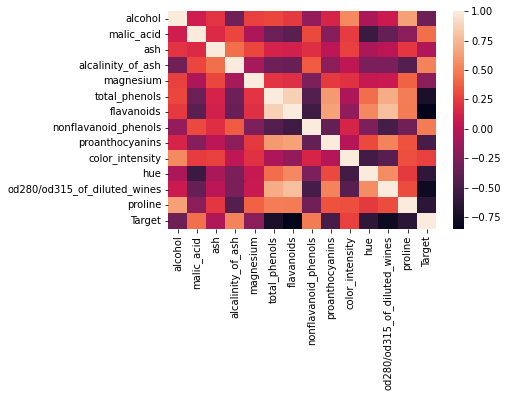

In [ ]:
import seaborn as sns
sns.heatmap(base_vinos.corr())

## Matriz de dispersiones para 2 variables a la vez

In [ ]:
fig = px.scatter_matrix(base_vinos,
                        dimensions=['malic_acid', 'ash', 
                                    'magnesium', 'total_phenols', 
                                    'color_intensity','proline'],
                        color="Target")
fig.show()

# Superficie de respuesta

In [ ]:
import plotly.graph_objects as go #Modulo con una funcion no tan comun como las que están en express

In [ ]:
import pandas as pd
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')
z_data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0,27.809850,49.619360,83.080670,116.66320,130.41400,150.72060,220.18710,156.15360,148.64160,203.78450,206.03860,107.16180,68.36975,45.33590,49.961420,21.89279,17.025520,11.743170,14.752260,13.667100,5.677561,3.312340,1.156517,-0.147662
1,1,27.719660,48.550220,65.213740,95.27666,116.99640,133.90560,152.34120,151.93400,160.11390,179.53270,147.61840,170.39430,121.81940,52.58537,33.088710,38.40972,44.248430,69.578600,4.019351,3.050024,3.039719,2.996142,2.967954,1.999594
2,2,30.426700,33.477520,44.809530,62.47495,77.43523,104.21530,102.73930,137.00040,186.07060,219.31730,181.76150,120.91540,143.18350,82.40501,48.471320,74.71461,60.090900,7.073525,6.089851,6.537450,6.666096,7.306965,5.736840,3.625628
3,3,16.665490,30.108600,39.969520,44.12225,59.57512,77.56929,106.89250,166.55390,175.23810,185.28150,154.50560,83.04330,62.61732,62.33167,60.559160,55.92124,15.172840,8.248324,36.680870,61.934130,20.268670,68.588190,46.498120,0.236009
4,4,8.815617,18.351600,8.658275,27.58590,48.62691,60.18013,91.32860,145.71090,116.06530,106.26620,68.69447,53.10596,37.92797,47.95942,47.426910,69.20731,44.954680,29.171970,17.916740,16.255150,14.655590,17.260480,31.222450,46.717040
5,5,6.628881,10.413390,24.819390,26.08952,30.16050,52.30802,64.71007,76.30823,84.63686,99.43240,62.52132,46.81647,55.76606,82.40990,140.264700,81.26501,56.457560,30.421640,17.287820,8.302431,2.981626,2.698536,5.886086,5.268358
6,6,21.839750,6.639270,18.970850,32.89204,43.15014,62.86014,104.66570,130.22940,114.84940,106.98730,61.89647,55.55682,86.80986,89.27802,122.422100,123.96980,109.095200,98.419560,77.613740,32.490310,14.673440,7.370775,0.037110,0.642339
7,7,53.343030,26.797970,6.639270,10.88787,17.20440,56.18116,79.70141,90.84530,98.27675,80.87243,74.79310,75.54661,73.43730,74.11694,68.174900,46.24076,39.938570,31.216530,36.883350,40.025250,117.429700,12.703280,1.729771,0.000000
8,8,25.667850,63.057170,22.141400,17.07400,41.74483,60.27227,81.42432,114.44400,102.32340,101.78780,111.03100,119.23090,114.07770,110.52960,59.193550,42.47175,14.635980,6.944074,6.944075,27.749360,0.000000,0.000000,0.094494,0.077323
9,9,12.827000,69.205540,46.762930,13.96517,33.88744,61.82613,84.74799,121.12200,145.27410,153.17970,204.78600,227.92420,236.30380,228.36550,79.344250,25.93483,6.944074,6.944074,6.944075,7.553681,0.000000,0.000000,0.000000,0.000000


In [ ]:
fig = go.Figure(data=[go.Surface(z=z_data.values)])
fig.show()

## Superficie de respuesta generada

In [ ]:
fig = go.Figure(go.Surface(
                            x = [5,6,7,8] ,
                            y = [1,2,3,4],
                            z = [
                                [5*1,6*1,7*1,8*1],
                                [5*2,6*2,7*2,8*2],
                                [5*3,6*3,7*3,8*3],
                                [5*4,6*4,7*4,8*4] #Por ahora escritura manual
                                ]))


fig.show()

In [ ]:
fig = go.Figure(go.Surface(
                            x = [5,6,7,8] ,
                            y = [1,2,3,4],
                            z = [ #x**y
                                [5**1,6**1,7**1,8**1],
                                [5**2,6**2,7**2,8**2],
                                [5**3,6**3,7**3,8**3],
                                [5**4,6**4,7**4,8**4] #Por ahora escritura manual
                                ]))


fig.show()

## Conclusiones de las superficies
* En el monte bruno se observan 3 picos, sin ningún otro patrón de distancia o linealidad destacable.
* En la superficie generarada observamos una clara relación lineal